In [146]:
#getting the goods
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [147]:
auction = pd.read_csv('data/auction.csv')

In [148]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [149]:
auction.info()
#looked and saw some of the missing bidder values were where the item was Xbox
#want to only look at watches --> new df where only items are watches (see below) - 1953 items no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
auctionid       10681 non-null int64
bid             10681 non-null float64
bidtime         10681 non-null float64
bidder          10665 non-null object
bidderrate      10670 non-null float64
openbid         10681 non-null float64
price           10681 non-null float64
item            10681 non-null object
auction_type    10681 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [150]:
auction = auction[auction.item == "Cartier wristwatch"]
auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 9 columns):
auctionid       1953 non-null int64
bid             1953 non-null float64
bidtime         1953 non-null float64
bidder          1953 non-null object
bidderrate      1953 non-null float64
openbid         1953 non-null float64
price           1953 non-null float64
item            1953 non-null object
auction_type    1953 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 152.6+ KB


In [151]:
#DATASET VARIABLES
#1953 auction items - all items are Cartir wristwatch
#auctionid - unique identifier of an auction  (do we think lot?)
#bid - proxy bid placed by a bidder
#bidtime 0 the time in days that the bid way placed prior to the start of the auction
#bidder - eBay username of the bidder
#bidderrate - eBay feedback rating of the bidder...
#open bid - the opening bid set by the seller
#price - the closing price (second highest bid + increment)
#item - auction item (all Cartier wristwatches)
#auction_type - duration: 3, 5, or 7 day

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2208cfd0>,
      dtype=object)

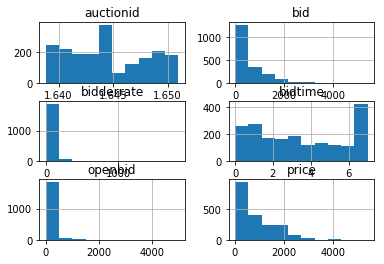

In [152]:
auction.hist()
#want to spread these out

In [153]:
auction.nunique()

auctionid        136
bid              692
bidtime         1919
bidder           678
bidderrate       152
openbid           52
price            112
item               1
auction_type       3
dtype: int64

In [154]:
#Initial Thoughts...
#how many bidders are winners? - who bid the highest
#how many bidders/buyers are in crossover sales
#does the bidderrate correlate at all with the amount spent?
#price -> spread between winner?
#groupby & apply

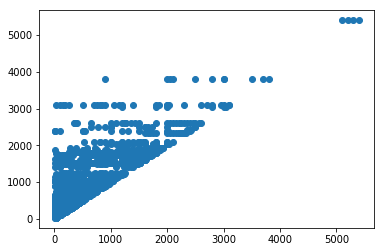

In [155]:
plt.scatter(x = "bid", y = "price", data = auction)

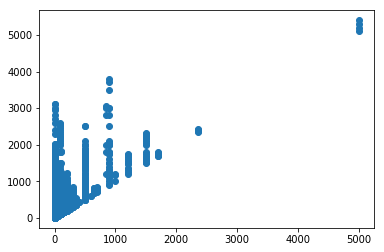

In [156]:
plt.scatter(x = "openbid", y = "bid", data = auction)

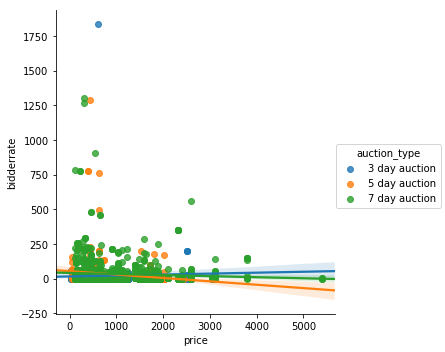

In [157]:
sns.lmplot( "price", "bidderrate", auction, hue = "auction_type")

In [158]:
#correlation between bidderrate & price

In [159]:
#NEW VARIABLE - spread: the difference between an items bid price and the item's realized price
auction["spread"] = auction.price - auction.bid
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction,2.5
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction,77.5
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,57.5
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,27.5
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction,0.0


In [160]:
#NEW VARIABLE - winning bid: the bid placed that was succesful
#this may show up multiple times and i believe it is because a bid may be placed and executed multiple times by the platform if another bidder presents a competing bid
#there will be cases in which this is true for one bidder twice/item
auction["buyer"] = np.where(auction["spread"] == 0, True, False)
auction.rename(columns = {"buyer": "winning_bid"}, inplace = True)
auction.head()

#by running the below code - i can see that some of the values where the spread is 0 are duplicated in on auction item because of the above
#dfspread = auction[["spread","auctionid"]]
#dfspread.head()
#dfspread[(dfspread["spread"] == 0) & (dfspread["auctionid"].count()>1)]

#dfspreadnil = dfspread[dfspread["spread"] == 0]
#dfspreadnil["auctionid"].value_counts().sort_values(ascending = False)

#evident at these auctionid's
#1641783552    2
#1650986455    2
#1649726994    2
#1649848613    2
#1648968984    2
#1643903372    2
#1644681469    2
#1641722275    2
#1642424500    2
#1649173313    2
#1640936328    2
#1640179146    2

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,winning_bid
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction,2.5,False
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction,77.5,False
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,57.5,False
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,27.5,False
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction,0.0,True


In [161]:
#NEW VARIABLE - item_buyer: if the client bidding on an item is succesful
#new df where we are just looking at succesful bids
w_bidders = auction[(auction["winning_bid"] == True)]
#newer df of winning succesful bidders by auctionid & bidder name
s_bidders = w_bidders.groupby("auctionid")["bidder"].value_counts()
s_bidders.to_dict()
#now we have our new column 
auction["item_buyer"] = auction.set_index(["auctionid", "bidder"]).index.map(s_bidders.get)
#...but need to replace the nulls with False and values >=1 with True
auction["item_buyer"] = np.where(auction["item_buyer"] >= 1, True, False)
#checking to see where i know a bidder shows up multiple times that all will reflect true... woot
auction[auction["auctionid"] == 1641783552]


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,winning_bid,item_buyer
962,1641783552,1200.0,0.150822,restdynamics,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,725.0,False,False
963,1641783552,275.0,0.272546,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1650.0,False,False
964,1641783552,375.0,0.272731,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1550.0,False,False
965,1641783552,575.0,0.273657,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1350.0,False,False
966,1641783552,725.0,0.273854,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1200.0,False,False
967,1641783552,1250.0,0.685359,dumbarton2715,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,675.0,False,False
968,1641783552,1500.0,0.690799,dumbarton2715,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,425.0,False,False
969,1641783552,1500.0,0.828762,restdynamics,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,425.0,False,False
970,1641783552,1650.0,0.829028,restdynamics,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,275.0,False,False
971,1641783552,1800.0,0.867361,dumbarton2715,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,125.0,False,False


In [162]:
#NEW VARIABLE - bidcount: total number of bids per auction item
#goal: get the count of bids for each auction item
#created a series called a_counts (auctionitem counts) which is the frequency of each auctionid value in auction dataframe
#turned the series into a dictionary so that i could map the the count of bids/item to each item in auction
a_counts = auction["auctionid"].value_counts()
a_counts = a_counts.to_dict()
auction["bidcount"] = auction["auctionid"].map(a_counts)
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,winning_bid,item_buyer,bidcount
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction,2.5,False,False,5
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction,77.5,False,False,5
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,57.5,False,False,5
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,27.5,False,False,5
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction,0.0,True,True,5


In [163]:
#NEW VARIABLE - bidder_count: number of bids per bidder on an auction item
#goal - bids per bidder in each sale
#for auction item - for bidder the count of one bidders recorded
bidder_count = auction.groupby("auctionid")['bidder'].value_counts()
bidder_count.to_dict() #taking the bidder counts and making a dictionary to map with
auction["bidder_count"] = auction.set_index(["auctionid", "bidder"]).index.map(bidder_count.get)
auction[auction["auctionid"] == 1638843936] #checking a value after mapping

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,winning_bid,item_buyer,bidcount,bidder_count
605,1638843936,500.0,0.478368,kona-java,181.0,500.0,1625.0,Cartier wristwatch,7 day auction,1125.0,False,False,7,1
606,1638843936,800.0,0.826389,doc213,60.0,500.0,1625.0,Cartier wristwatch,7 day auction,825.0,False,False,7,1
607,1638843936,600.0,3.761123,zmxu,7.0,500.0,1625.0,Cartier wristwatch,7 day auction,1025.0,False,False,7,1
608,1638843936,1500.0,5.226377,carloss8055,5.0,500.0,1625.0,Cartier wristwatch,7 day auction,125.0,False,True,7,3
609,1638843936,1600.0,6.570625,jdrinaz,6.0,500.0,1625.0,Cartier wristwatch,7 day auction,25.0,False,False,7,1
610,1638843936,1550.0,6.892917,carloss8055,5.0,500.0,1625.0,Cartier wristwatch,7 day auction,75.0,False,True,7,3
611,1638843936,1625.0,6.893113,carloss8055,5.0,500.0,1625.0,Cartier wristwatch,7 day auction,0.0,True,True,7,3


In [164]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,winning_bid,item_buyer,bidcount,bidder_count
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction,2.5,False,False,5,1
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction,77.5,False,False,5,1
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,57.5,False,False,5,2
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,27.5,False,False,5,2
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction,0.0,True,True,5,1


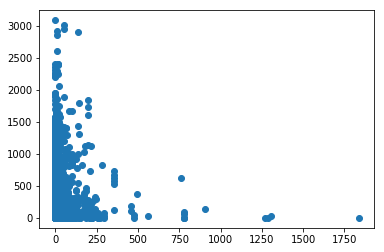

In [165]:
plt.scatter(auction.bidderrate, auction.spread)

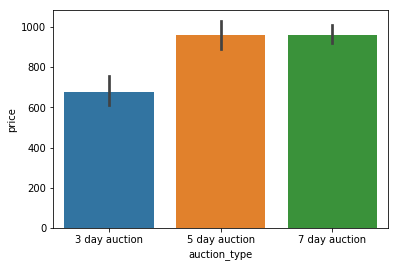

In [166]:
sns.barplot(x = "auction_type", y = "price", data = auction)

In [167]:
#to do:
#perhaps some additional groupbys...
#explanations of auctions.nunique()
#prices by sale type and customers
##bids by sale type & customers
#succesful bidders & bidding activity
#pd.crosstab(X, Y) to display relationships between two variables
#relevant visualizations --> see if anything can be logged....color maps..

#correlation explorations
    #corr = auction.corr()
    #corr.head()
    #corr[Variable].head()
    #sns.headmap(corr) --> starting to visualize relationships between variables 
    #something we will learn about more next class...
